In [2]:
#Imports
import os
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor 
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score



#Data path
Traffic_file_path = 'data_modified.csv'
df = pd.read_csv(Traffic_file_path)

df.head()

,date,date.1,year,month,day,day_num_(sunday=1),week_num,temperature,precipitation,windspeed,school_holidays,holidays,weekend(weekend=1),special_events,sunneklaas,total_traffic_per_hour
0,2023-04-16,4/16/2023,2023,4,16,1,16,282.05,0.0,24.1,0,0,1,0,0,200.17
1,2023-04-17,4/17/2023,2023,4,17,2,16,283.35,0.0,25.7,0,0,0,0,0,174.24
2,2023-04-18,4/18/2023,2023,4,18,3,16,282.75,0.0,46.7,0,0,0,0,0,142.52
3,2023-04-19,4/19/2023,2023,4,19,4,16,284.05,0.0,53.1,0,0,0,0,0,166.86
4,2023-04-20,4/20/2023,2023,4,20,5,16,282.05,1.6,41.8,0,0,0,0,0,156.47


In [3]:
df = df.dropna(subset=['total_traffic_per_hour'])
df.to_csv('data_modified.csv', index=False)

In [5]:
# Create target object and call it y
y = df.total_traffic_per_hour

# Create X
features = ['year', 'month', 'week_num', 'temperature', 'precipitation', 'windspeed', 'school_holidays', 'holidays', 'weekend(weekend=1)', 'special_events']
X = df[features]

# Split into validation and training data
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

# Specify Model
Traffic_data_model = RandomForestRegressor(random_state=1)
# Fit Model
Traffic_data_model.fit(train_X, train_y)

RandomForestRegressor(random_state=1)

In [6]:
# Make validation predictions and calculate mean absolute error
val_predictions = Traffic_data_model.predict(val_X)
val_mae = mean_absolute_error(val_predictions, val_y)
print("Validation MAE when not specifying max_leaf_nodes: {:,.0f}".format(val_mae))

Validation MAE when not specifying max_leaf_nodes: 44


In [7]:
# Using best value for max_leaf_nodes
Traffic_data_model = RandomForestRegressor(max_leaf_nodes=100, random_state=1)
Traffic_data_model.fit(train_X, train_y)
val_predictions = Traffic_data_model.predict(val_X)
val_mae = mean_absolute_error(val_predictions, val_y)
print("Validation MAE for best value of max_leaf_nodes: {:,.0f}".format(val_mae))

Validation MAE for best value of max_leaf_nodes: 44


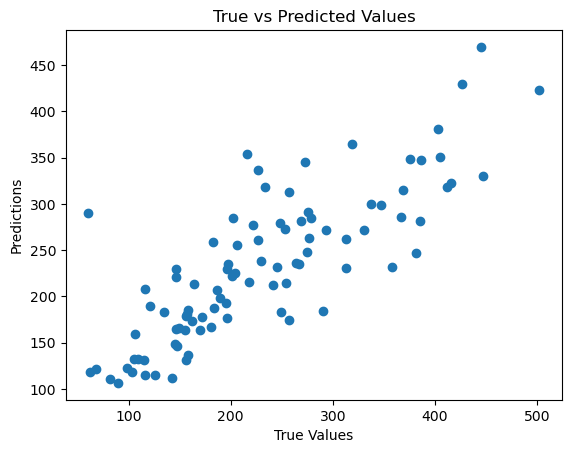

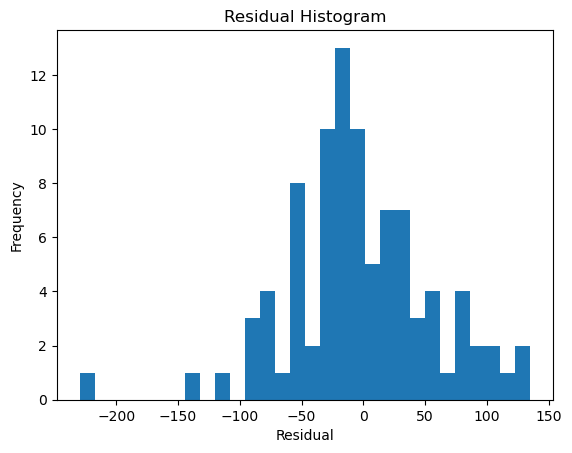

In [8]:
plt.scatter(val_y, val_predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True vs Predicted Values')
plt.show()

residuals = val_y - val_predictions
plt.hist(residuals, bins=30)
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.title('Residual Histogram')
plt.show()

In [9]:
scores = cross_val_score(Traffic_data_model, train_X, train_y, scoring='neg_mean_absolute_error', cv=5)
mean_score = -scores.mean()
print("Cross-validated MAE: {:,.0f}".format(mean_score))

Cross-validated MAE: 47


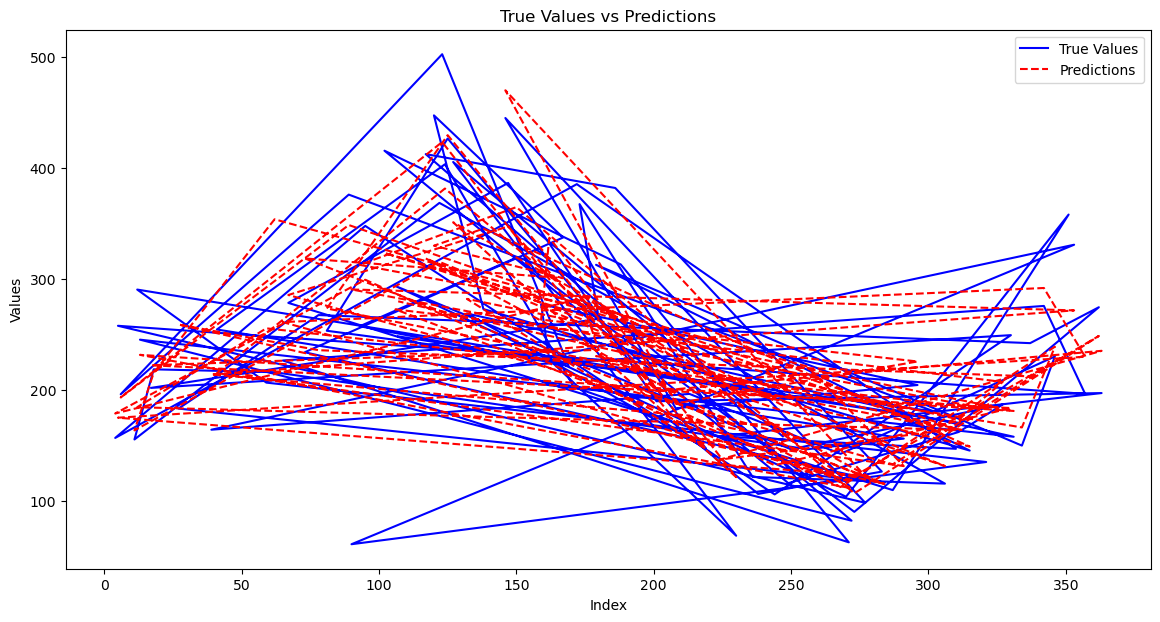

In [10]:
# Maak voorspellingen op basis van de validatieset
val_predictions = Traffic_data_model.predict(val_X)

# Zorg ervoor dat de voorspellingen een index hebben die overeenkomt met val_y
val_predictions_series = pd.Series(val_predictions, index=val_y.index)

# Zet de voorspellingen en de echte waarden in een DataFrame voor eenvoudige plotten
results_df = pd.DataFrame({
    'True Values': val_y,
    'Predictions': val_predictions_series
})

# Maak een line chart
plt.figure(figsize=(14, 7))

# Plot de echte waarden
plt.plot(results_df.index, results_df['True Values'], label='True Values', color='b')

# Plot de voorspellingen
plt.plot(results_df.index, results_df['Predictions'], label='Predictions', color='r', linestyle='--')

# Voeg labels en een titel toe
plt.xlabel('Index')
plt.ylabel('Values')
plt.title('True Values vs Predictions')

# Voeg een legenda toe
plt.legend()

# Toon de grafiek
plt.show()